# Understanding Bonds

Bond Yields: Bond yields can essentially be a synonym for bond returns. Bond securities are issued by the government and corporations and are tend to be affected by the economy and inflation. For example, if inflation is high, this is attributed to high consumption and investment, which means a stronger economy. But we don't want inflation to be too high and as a result, to tame inflation, the Federal Reserves (if US Treasury) increases interest rates. This indirectly leads to greater yields from consumer expectations. 

In the case of corporations, corporations issue bonds and debt when they lack the fund for a certain project. This may be the case when interest rates rise, increasing the cost of borrowing. 

Bond prices: Are determined by supply and demand. For example, if the economy is strong, then demand is low for the bond and therefore its price is low. This price at the moment is below its equilibrium level, until the Federal Reserves increases its interest rates, bringing higher demand to the bond due to an increase in yields, subsequently raising its price.

\begin{equation*}
 Yield = \frac{Annual Coupon Payment}{Price} 
 \end{equation*}

From the above we can see the inverse relationship between yield and price: as price increases, yield falls and vice versa. Essentially, if price is low, we want to increase return (yield) to increase price to its equilibrium.
Thus, interest rates indirectly drive bond prices and yield rates. It is possible to argue that bond prices drive interest rates, but rarely: maybe expectations of the economy influences bond prices and subsequently interest rates.

Coupon rates: this is the percent of the price of coupon that one gets in this period. For example, if a security has a price of 100 and a coupon rate of 5%, then our coupon payment is 5. If coupon rate is greater then market rate, then the price of the treasury security is greater than its face value i.e. a premium and subsequently above par.

Face value (par value): this is price set by the issuer of the bond, usually $1000. A buyer of this bond will usually get this value back. The surplus from providing money to government will be determined by the yield. 

Time to maturity: when the bondholder receives his face value along with his returns. The maturity usually comes in the form of weeks (4,13, 26, 52) (short time to maturity), years (2 to 10) (medium time to maturity), and years years (20 to 30 years) (long time to maturity). 

The longer the time to maturity, the higher the yield due to the risks involved. The treasury prices will also have greater volatility than shorter yield to maturities. Volatility is attributed to 1) Time value of money and 2) reinvestment risk.

1) Time Value of Money: If the interest rate rises, then we receive our full payment at a much later time (rather than sooner). This is due to future cash flows being discounted more heavily, reducing our present value.

2) Reinvestment risk: if interest rate rises given we have already bought one security, then we are missing out on the new security i.e. the oppurtunity cost. This is very significant for firms as it can reduce their optimal portfolio along with being able to sell their bond (due to it having to compete with bonds of higher rates).



# Data: Bond Securities

We gather bond data from Yahoo Finance. These bond variables are: US, Euro, Vanguard, Move, PIMCO, US Aggregate and State Street. It is important that to note that there is a high possibility that these data are highly correlated. For instance, US bonds may be in the PIMCO or State Street Bond index. However, the purpose of this project is not to delineate the independency of the data, but rather to show the programming exercise with Python.

In [25]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
from scipy.linalg import inv

In [26]:
##US
US_Bonds = yf.download('TLT', start='1990-01-01', end='2023-08-01')

##Europe
Euro_Bonds = yf.download('IBGL.L', start='1990-01-01', end='2023-08-01')

##Vangaurd
Vanguard_Bonds = yf.download('VCLT', start='1990-01-01', end='2023-08-01')

##Move
Move_Bonds = yf.download('^MOVE', start='1990-01-01', end='2023-08-01')

##PIMCO
PIMCO_Bonds = yf.download('BOND', start='1990-01-01', end='2023-08-01')


##State Street Aggregate Bonds
StateStreet_Bonds = yf.download('SSFEX', start='1990-01-01', end='2023-08-01')

##Turning Date index into columns
US_Bonds = US_Bonds.reset_index()
Euro_Bonds = Euro_Bonds.reset_index()
Vanguard_Bonds = Vanguard_Bonds.reset_index()
Move_Bonds = Move_Bonds.reset_index()
PIMCO_Bonds = PIMCO_Bonds.reset_index()
StateStreet_Bonds = StateStreet_Bonds.reset_index()


##merging data
df = pd.DataFrame({
    'Date': Vanguard_Bonds['Date'],
    'US Bonds': US_Bonds['Close'],
    'Euro Bonds': Euro_Bonds['Close'],
    'Vanguard Bonds': Vanguard_Bonds['Close'],
    'Move Bonds': Move_Bonds['Close'],
    'PIMCO Bonds': PIMCO_Bonds['Close'],
    'State Street Bonds': StateStreet_Bonds['Close']
})


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [27]:
## ensuring dates are aligned and correct
df.head()

,Date,US Bonds,Euro Bonds,Vanguard Bonds,Move Bonds,PIMCO Bonds,State Street Bonds
0,2009-11-23,81.519997,150.761993,75.260002,120.209999,99.959999,100.000000
1,2009-11-24,82.529999,150.975006,75.260002,122.879997,100.309998,100.199997
2,2009-11-25,83.000000,151.485001,75.739998,130.289993,100.300003,100.000000
3,2009-11-27,83.849998,151.365005,75.849998,132.350006,100.750000,100.300003
4,2009-11-30,84.220001,150.703995,76.000000,129.139999,100.889999,100.199997


In [28]:
## summary statistics
df.describe()

,US Bonds,Euro Bonds,Vanguard Bonds,Move Bonds,PIMCO Bonds,State Street Bonds
count,5287.000000,3935.000000,3443.000000,5116.000000,2872.000000,2229.000000
mean,110.910932,176.163742,89.704270,85.832305,105.546751,98.180386
std,21.080957,38.380419,9.199132,31.696319,5.305041,5.570646
min,80.650002,117.410004,69.360001,36.619999,87.000000,81.800003
25%,91.419998,143.896500,83.529999,61.860001,104.080002,95.800003
50%,108.500000,161.250000,89.080002,78.000000,106.550003,99.599998
75%,123.915001,204.564995,94.235001,104.124998,109.099998,101.699997
max,171.570007,268.755005,112.959999,264.600006,113.180000,107.500000


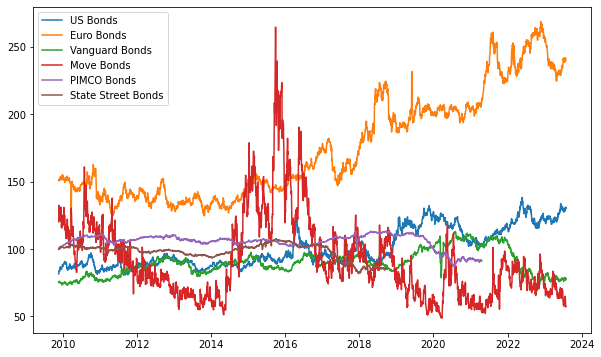

In [29]:
## plot
def graph(Date, prices):
    fig= plt.figure(figsize=(10,6))
    for rate in prices:
        label = rate.name
        plt.plot(Date, rate, label = label)
    plt.legend() 
    plt.show()
    
prices = [df['US Bonds'], df['Euro Bonds'], df['Vanguard Bonds'], 
          df['Move Bonds'], df['PIMCO Bonds'], df['State Street Bonds']]
graph(df['Date'], prices)

From above, we notice that our index bonds tend to co-move together with government and other indices. This was expected as we mentioned that some government bonds may be a subset of certain indices, with the exception of Move Bonds, of course. This is attributed to the fact the Move Bonds index is based on volatility and uncertainty of the US Treasury bonds rather than its price. There was a large spike slightly before the year 2016 begins, probably due to Donald Trump winning the US presidential election. 

Thus, it is worth considering to drop our Move Bond index, but we keep it as part of the exercise in measuring returns. 

#### Returns Data

In [30]:
bond_columns = ['Euro Bonds', 'US Bonds', 'Vanguard Bonds', 
                'Move Bonds', 'PIMCO Bonds', 'State Street Bonds']

return_columns = ['Euro Returns', 'US Returns', 'Vanguard Returns', 
                  'Move Returns', 'PIMCO Returns', 'State Street Returns']

df_returns = pd.DataFrame(df['Date'])

# Calculate log returns and store them in df_returns
for bond_col, return_col in zip(bond_columns, return_columns): 
    df_returns[return_col] = np.log(df[bond_col] / df[bond_col].shift(1))

In [31]:
df_returns.describe()

,Euro Returns,US Returns,Vanguard Returns,Move Returns,PIMCO Returns,State Street Returns
count,3934.000000,5286.000000,3442.000000,5115.000000,2871.000000,2228.000000
mean,0.000002,0.000039,0.000010,-0.000014,-0.000031,-0.000071
std,0.010188,0.009069,0.007464,0.043180,0.002939,0.003135
min,-0.232378,-0.069010,-0.092359,-0.298878,-0.042757,-0.034656
25%,-0.004482,-0.005256,-0.003554,-0.022529,-0.001348,-0.001465
50%,0.000000,0.000427,0.000327,-0.002551,0.000098,0.000000
75%,0.004653,0.005330,0.003917,0.020318,0.001443,0.001508
max,0.226317,0.072503,0.093687,0.372005,0.019797,0.024892


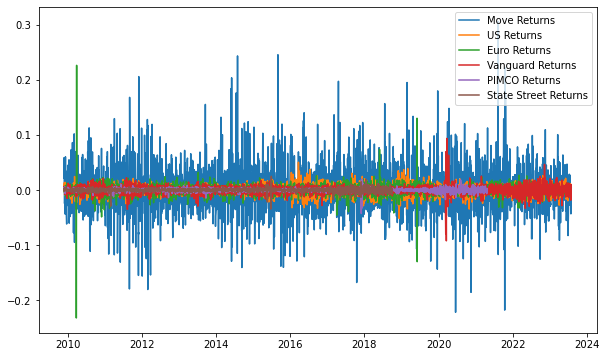

In [32]:
ret = [df_returns['Move Returns'], df_returns['US Returns'], df_returns['Euro Returns'], 
       df_returns['Vanguard Returns'], df_returns['PIMCO Returns'],
      df_returns['State Street Returns']]
graph(df_returns['Date'], ret)

# Optimal Portfolio

The purpose of portfolio optimization in finance is to yield the highest expected return with the lowest risk through applying weights to each security. Expressed mathematically:
\begin{equation*}
Minimize \quad \frac{1}{2}w^{T}\sum w
\end{equation*}
\begin{equation*}
s.t. \quad m^{T}w \geq \mu _{b} \quad and \quad e^{T}w = 1
\end{equation*}

$w$ is a vector of the share allocated to each security in the portfolio, $\sum$ is a $m \times n$ matrix of covariance of returns, $\mu_b$ is the baseline return, $m$ is a vector of expected returns and $e$ is a vector of 1s.

The first line $w^{T}\sum w$ means we want to minimize the variance. 
The second line says we want to have a return that can be greater or equal the baseline return whilst controlling for the fact that the weights/shares of securities should sum to 1.

## Returns-Based Portfolio Optimization

In [33]:
## eliminate Date for ease
df_returns = df_returns.drop(['Date'], axis=1)
df_returns = df_returns.dropna() ##drop nas

number_security = df_returns.shape[1]  # Number of securities (where 1 denotes column, and we have 3 columns)

# Calculate the mean returns, covariance matrix and correlation matrix
mu = np.mean(df_returns, axis=0).values  
C = np.cov(df_returns.T)
corr_matrix = df_returns.corr()

In [34]:
print("Expected Returns:") 
print(mu) #Move Bonds are highest
print("Covariance Matrix")
print(C)

Expected Returns:
[ 1.73727602e-04  7.49243573e-05  6.73267766e-05 -6.07180680e-05
  5.20059784e-05 -7.07840903e-05]
Covariance Matrix
[[ 1.12884276e-04 -6.11794390e-06 -1.27053155e-06  2.92931805e-06
   1.08044575e-06  8.15641965e-07]
 [-6.11794390e-06  6.93200294e-05  1.26293359e-06  4.35061846e-06
   8.55170010e-08 -6.30504965e-07]
 [-1.27053155e-06  1.26293359e-06  3.32690855e-05  6.78484548e-06
  -4.53380364e-08 -5.55690972e-07]
 [ 2.92931805e-06  4.35061846e-06  6.78484548e-06  1.67567007e-03
   6.17644642e-06  5.53257640e-08]
 [ 1.08044575e-06  8.55170010e-08 -4.53380364e-08  6.17644642e-06
   7.12920220e-06 -3.19110569e-08]
 [ 8.15641965e-07 -6.30504965e-07 -5.55690972e-07  5.53257640e-08
  -3.19110569e-08  9.83040043e-06]]


In [35]:
## arbitrary lower and upper bounds
lb = 0.05 * np.ones(number_security)
ub = 0.7 * np.ones(number_security)

# define initial portfolio function
def initport(mu, lb, ub):
    weights = lb.copy() 
    ii = np.argsort(-mu)  # sort indices of securities based on expected returns
    amount_left = 1 - np.sum(weights)  # leftover weights
    initial_index = 0  # initialize index for securities
    while (amount_left > 0) and (initial_index < number_security):  
        i = ii[initial_index]  
        change = min(ub[i] - lb[i], amount_left)  
        weights[i] = weights[i] + change  # update weight
        amount_left -= change  # decrease amount left to allocate
        initial_index += 1  # move to next security
    return weights

# creating optimal weights
weights = initport(mu, lb, ub)

Above, we create upper and lower bounds, so that we don't want too much or too little of certain securities.

We then create a loop to obtain our optimal. We first arrange expected returns in descending order. This will subsequently allow us to put more weight on a security with higher returns. With the amount of weight left, or provided our weight is non-negative, we move to the next security with the highest return and allocate x$\%$ of the remaining weight there. This process continues until we have no weights left.

In [36]:
## weight results
print("Portfolio Weights (weights):")
print(weights)

Portfolio Weights (weights):
[0.7  0.1  0.05 0.05 0.05 0.05]


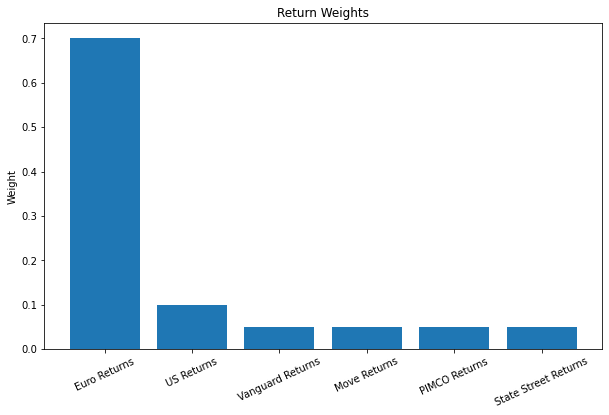

In [37]:
## plot 
plt.figure(figsize=(10, 6))
plt.bar(range(len(weights)), weights, tick_label=corr_matrix.columns)
plt.xticks(rotation = 25)
plt.title('Return Weights')
plt.ylabel('Weight')
plt.show()

The highest weight of 0.7, or $70\%$, is applied to Euro Bonds. This can be attributed to the fact it has the highest returns of all six variables.

In [38]:
## variance and mean results
V_mv = np.dot(weights.T, np.dot(C, weights))  #variance
R_mv = np.dot(mu, weights)  # Expected return

print("\nPortfolio Variance (V):")
print(V_mv)
print("\nExpected Return (R):")
print(R_mv) 


Portfolio Variance (V):
5.982617549410894e-05

Expected Return (R):
0.0001284932867093876


In [39]:
## annualized returns
Annualized_returns_mv = R_mv*252 ## we follow JetBrains.com for 252 trading days in a year
print("\nAnnualized Returns:")
print(Annualized_returns_mv) ## 3% yearly returns


Annualized Returns:
0.032380308250765676


## Risk Based Portfolio Optimisation

The previous example algroithm focused on finding the optimal portfolio based on returns and thus ignored the risk component in the portfolio i.e. the variance-covariance matrix $\Sigma$. In this section, we aim to control for this.

In [40]:
## variance weights
def variance_weights(cov_matrix):
    inv_diag = 1.0 / np.diag(cov_matrix) ## i.e 1/ variance
    inv_diag = inv_diag / inv_diag.sum() ##normalize weights to sum to 1
    return inv_diag

The first step is to acknowledge the fact that assets with higher variance means more risk. Thus, we want a lower weight for this asset, and taking its inverse yields just that. For example, an asset with variance 2 will yield 1/2 weight, whilst an asset with variance 3 will yield a weight of 1/3. The variance are expressed along the diagonals of the covariance matrix.

And as the weights of a portfolio should sum to 1, we normalize it by taking the share of each weight:

$\begin{equation*}
InverseDiagonal_i = \frac{\frac{1}{\sum_{ii}}}{\sum^{n}_{i} \frac{1}{\sum_{ii}}}
\end{equation*}$


In [41]:
## calculate correlation matrix and apply variance weight
corr_matrix = df_returns.corr()
cov_matrix = corr_matrix.values @ corr_matrix.values.T
weights_variance = variance_weights(cov_matrix)

print("\nVariance Weights:")
print(weights_variance)


Variance Weights:
[0.16621513 0.1663923  0.16694576 0.16672506 0.16664967 0.16707208]


In [42]:
## adjusted variance weights
weights_variance_adjusted = variance_weights(corr_matrix)

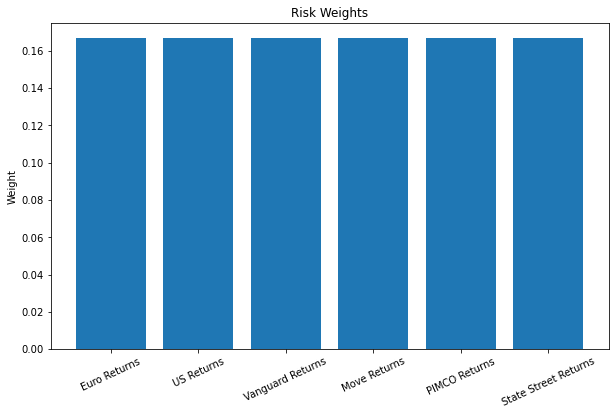

In [43]:
## plot 
plt.figure(figsize=(10, 6))
plt.bar(range(len(weights_variance_adjusted)), weights_variance_adjusted, tick_label=corr_matrix.columns)
plt.xticks(rotation = 25)
plt.title('Risk Weights')
plt.ylabel('Weight')
plt.show()

In [44]:
cov_matrix = np.cov(df_returns.T)
R_variance_adjusted = np.dot(weights_variance_adjusted, np.mean(df_returns, axis=0))
V_variance_adjusted = np.dot(weights_variance_adjusted.T, np.dot(cov_matrix, weights_variance_adjusted))

print("\nPortfolio Variance (V):")
print(V_variance_adjusted)
print("\nExpected Return (R):")
print(R_variance_adjusted)


Portfolio Variance (V):
5.3830039010126826e-05

Expected Return (R):
3.941375927450886e-05


In [45]:
## Annualized returns
Annualized_returns_V = R_variance_adjusted*252 ##we follow JetBrains.com for annual = 252
print("\nAnnualized Returns:")
print(Annualized_returns_V) ##1% yearly returns


Annualized Returns:
0.009932267337176233


## Comparing Results-Based and Variance-Based

The Sharpe Ratio is mathematically expressed as:
\begin{equation*}
S_a = \frac{E\left[ R_a - R_f \right]}{\sigma_{a}}
\end{equation*}

This formula considers the equation of how much more we should recieve in return when buy a non-risk-free asset whilst controlling for the fact that $0 < \sigma_a \leq 1$. As a result, the greater the distance between the risk and risk-free asset, the higher the Sharpe ratio. An average Sharpe ratio, according to Google, is 0.5.

In [46]:
##Sharpe Ratio (assume risk-free rate of 0)
rf = 0  # Risk-free rate
sharpe_ratio_mv = (Annualized_returns_mv - rf) / np.sqrt(V_mv*252) 
sharpe_ratio_variance_adjusted = (Annualized_returns_V - rf) / np.sqrt(V_variance_adjusted*252)

In [47]:
summary_df = pd.DataFrame({
    'Method': ['Returns-Based', 'Co-Variance-Based'],
    'Portfolio Variance': [V_mv, V_variance_adjusted],
    'Expected Return': [R_mv, R_variance_adjusted],
    'Annualized Return': [Annualized_returns_mv, Annualized_returns_V],
    'Sharpe Ratio (Annualized)': [sharpe_ratio_mv, sharpe_ratio_variance_adjusted]
})

print("\nSummary Table:")
print(summary_df)


Summary Table:
              Method  Portfolio Variance  Expected Return  Annualized Return  \
0      Returns-Based            0.000060         0.000128           0.032380   
1  Co-Variance-Based            0.000054         0.000039           0.009932   

   Sharpe Ratio (Annualized)  
0                   0.263715  
1                   0.085278  


The table can be explained as follows: the portfolio variance is smaller for co-variance-based model and the expected return and annualized is greater for returns-based model. These results were expected: we concentrated our algorithms to minimize variance and maximize returns. 

The Sharpe Ratio is greater for the Returns-Based model. This solidifies we should move forward with the Returns-Based model despite the slightly bigger variance.